# download stock price data from yahoo! finance

sources:
- https://towardsdatascience.com/a-comprehensive-guide-to-downloading-stock-prices-in-python-2cd93ff821d4

## load libraries

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials

## yfinance

### download example

In [12]:
tsla_df = yf.download('TSLA', 
                      start='2019-01-01', 
                      end='2019-12-31', 
                      progress=False)

print(tsla_df.shape)
tsla_df.tail()

(252, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,82.356003,84.402000,82.000000,83.844002,83.844002,66598000
2019-12-24,83.671997,85.094002,82.538002,85.050003,85.050003,40273500
2019-12-26,85.582001,86.695999,85.269997,86.188004,86.188004,53169500
2019-12-27,87.000000,87.061996,85.222000,86.075996,86.075996,49728500
2019-12-30,85.758003,85.800003,81.851997,82.940002,82.940002,62932000


###  ticker example

151
['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city']
NMS


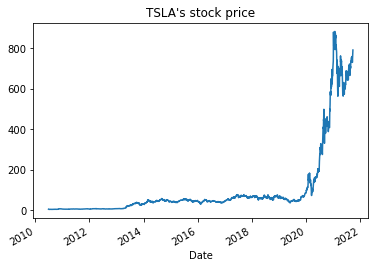

In [30]:
ticker = yf.Ticker('TSLA')

info = ticker.info
info_keys = list(info.keys())
print(len(info_keys))
print(info_keys[:5])
print(info['exchange'])

tsla_df = ticker.history(period="max")

tsla_df['Close'].plot(title="TSLA's stock price")
plt.show()

## yahoo_financials

### download example

In [45]:
yahoo_financials = YahooFinancials('TSLA')

display(yahoo_financials.get_stock_quote_type_data())

data = yahoo_financials.get_historical_price_data(start_date='2000-01-01', 
                                                  end_date='2019-12-31', 
                                                  time_interval='weekly')

tsla_df = pd.DataFrame(data['TSLA']['prices'])
tsla_df = tsla_df.drop('date', axis=1).set_index('formatted_date')
tsla_df.tail()

{'TSLA': {'exchange': 'NMS',
  'shortName': 'Tesla, Inc.',
  'longName': 'Tesla, Inc.',
  'exchangeTimezoneName': 'America/New_York',
  'exchangeTimezoneShortName': 'EDT',
  'isEsgPopulated': False,
  'gmtOffSetMilliseconds': '-14400000',
  'quoteType': 'EQUITY',
  'symbol': 'TSLA',
  'messageBoardId': 'finmb_27444752',
  'market': 'us_market'}}

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2019-12-02,67.772003,65.449997,65.879997,67.178001,147591000,67.178001
2019-12-09,73.042000,67.015999,67.318001,71.678001,195420000,71.678001
2019-12-16,82.599998,72.500000,72.510002,81.117996,368259000,81.117996
2019-12-23,87.061996,82.000000,82.356003,86.075996,209769500,86.075996
2019-12-30,85.800003,81.851997,85.758003,82.940002,62932000,82.940002


## download for list of companies example

In [43]:
assets = ['TSLA', 'MSFT', 'FB', 'ESTC']

yahoo_financials = YahooFinancials(assets)

data = yahoo_financials.get_historical_price_data(start_date='2019-01-01', 
                                                  end_date='2019-12-31', 
                                                  time_interval='weekly')

prices_df = pd.DataFrame({
    a: {x['formatted_date']: x['adjclose'] for x in data[a]['prices']} for a in assets
})

print(prices_df.shape)
prices_df.tail()

(52, 4)


,TSLA,MSFT,FB,ESTC
2019-11-26,66.973999,147.020706,199.699997,76.410004
2019-12-03,67.905998,148.800095,201.339996,62.279999
2019-12-10,76.300003,152.899551,197.919998,62.150002
2019-12-17,83.844002,154.747772,206.179993,64.669998
2019-12-24,82.940002,154.924728,204.410004,64.040001
